### **Pump Sensor Data**

Source and Load Data

In [ ]:
from google.colab import drive
import pandas as pd
import zipfile

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the CSV file into a DataFrame
csv_file_path = '/content/drive/MyDrive/Major_Project/Data/sensor.csv'
df = pd.read_csv(csv_file_path,index_col=0)


In [ ]:
df.shape

(220320, 54)

In [ ]:
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16      

Missing Number Visualization

In [ ]:
import missingno as msno

msno.matrix(df, labels=True, sparkline=False)

Percent of Missing Values

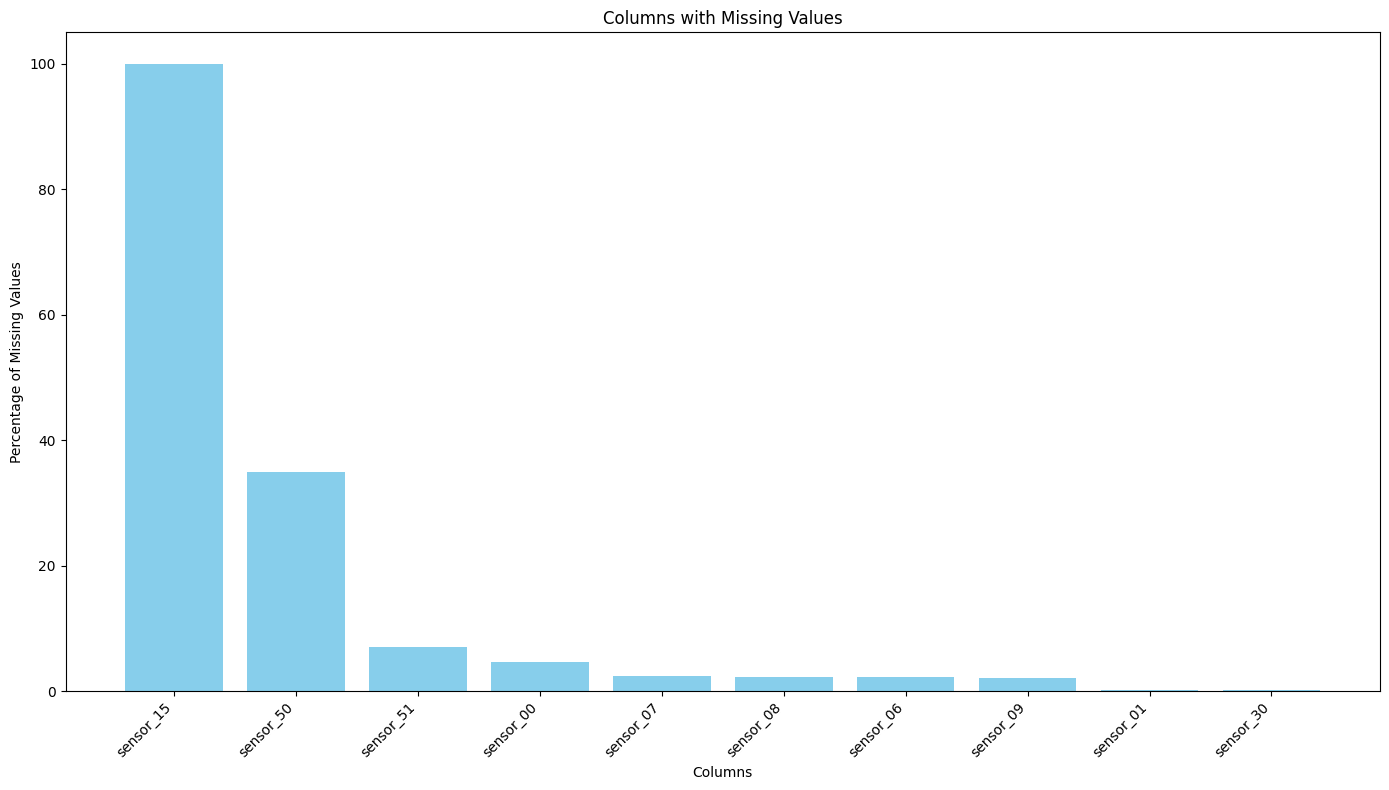

In [ ]:
#Function that calculates the percentage of missing values
import matplotlib.pyplot as plt
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent'])
    idx = nans['percent'] > 0
    return nans[idx]

missing_cols = calc_percent_NAs(df).head(10)

# Plot the percentage of missing values for all columns
plt.figure(figsize=(14, 8))
plt.bar(missing_cols.index, missing_cols['percent'] * 100, color='skyblue')
plt.title('Columns with Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt


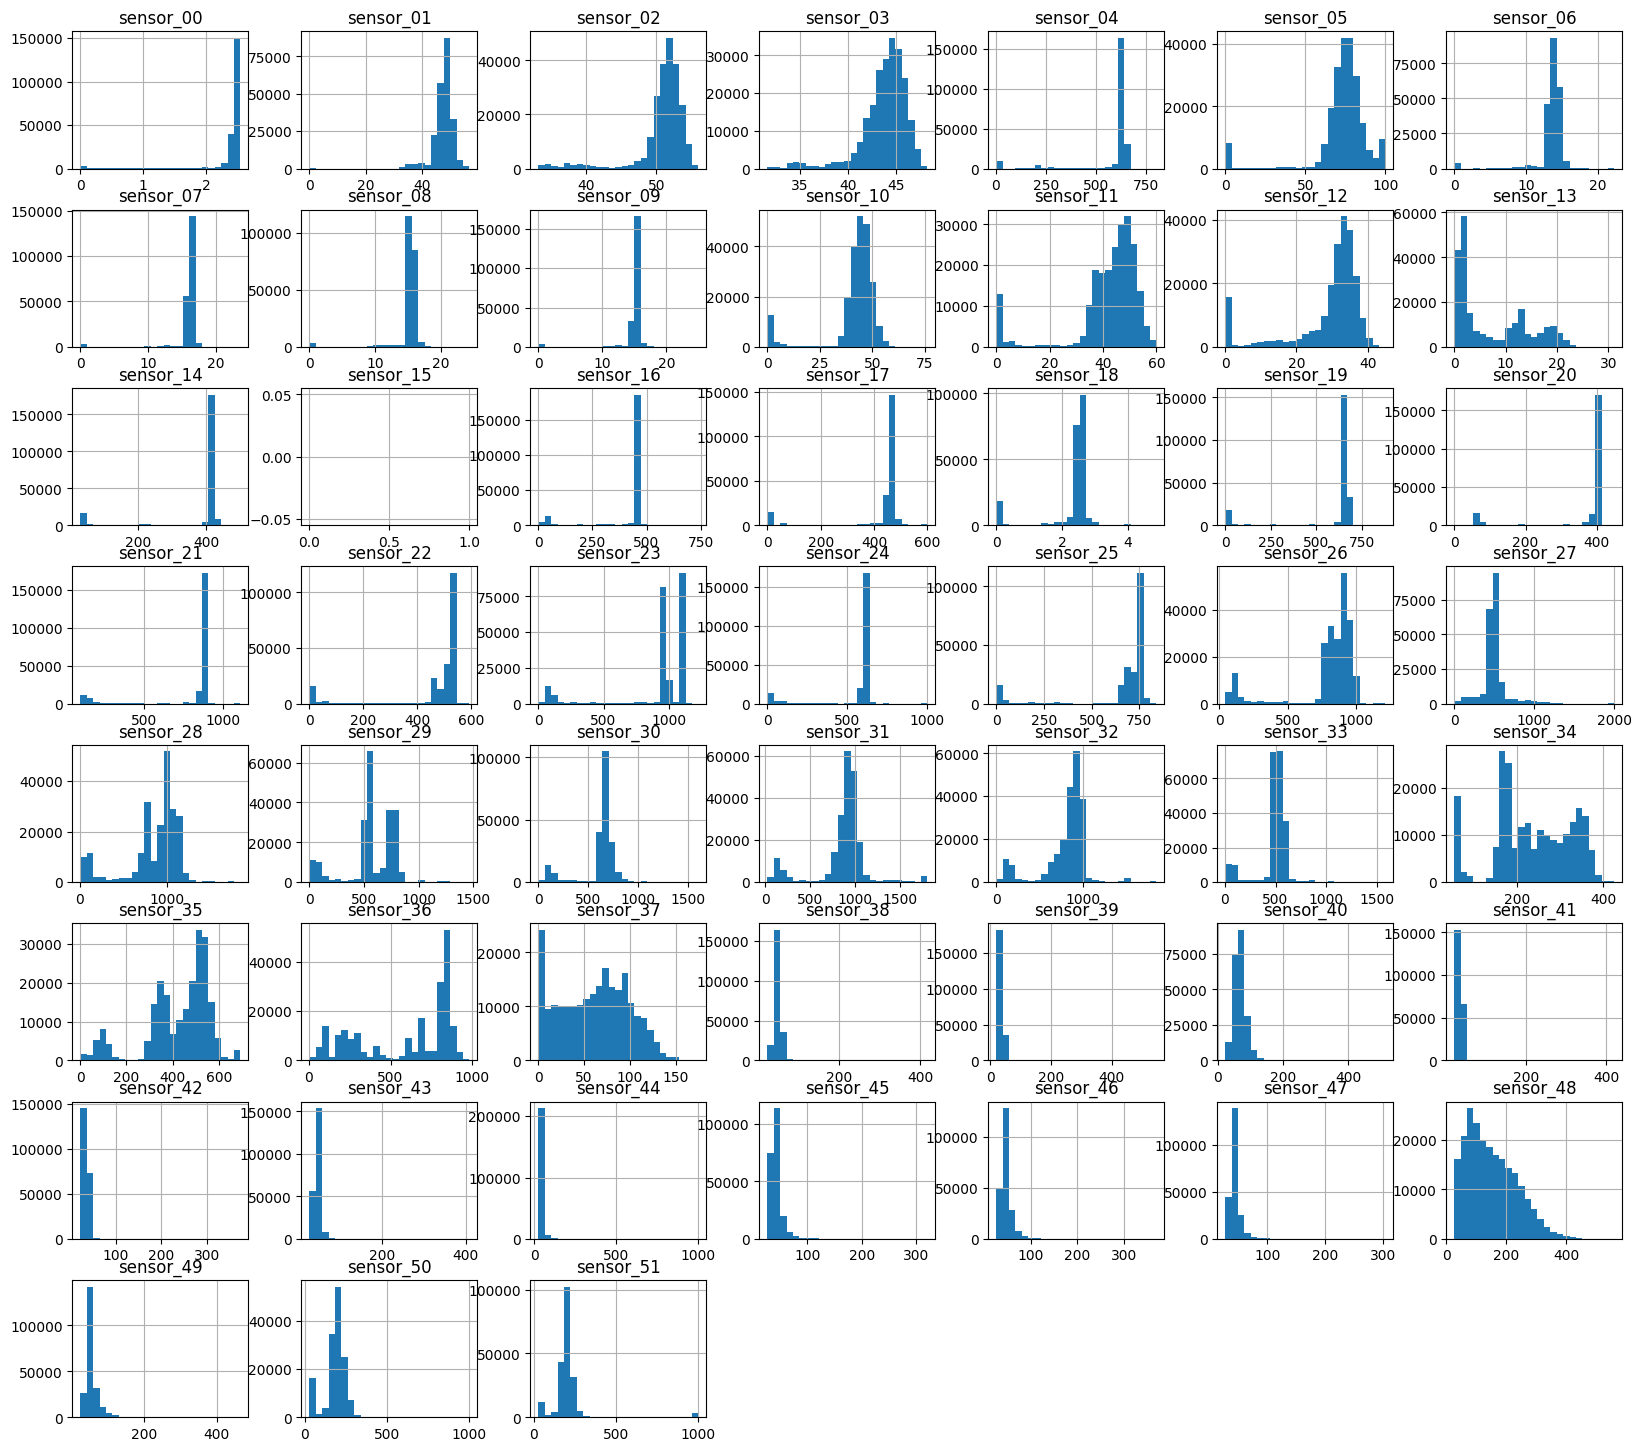

In [ ]:
# Histograms for before the data
import matplotlib.pyplot as plt

df.hist(df.columns, bins=25, layout=(8,7), figsize=(20, 18))
plt.show()

In [ ]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
sensor_00,210112.000000,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.000000,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.000000,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.000000,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.000000,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.000000,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.000000,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.000000,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.000000,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960
sensor_09,215725.000000,14.799210,2.091963,0.000000,15.053530,15.082470,15.118630,25.000000


In [ ]:
df['machine_status'].value_counts(dropna=False).head()

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


<ipython-input-59-2ab63f87f27d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='machine_status',data=df,palette='Blues_d');


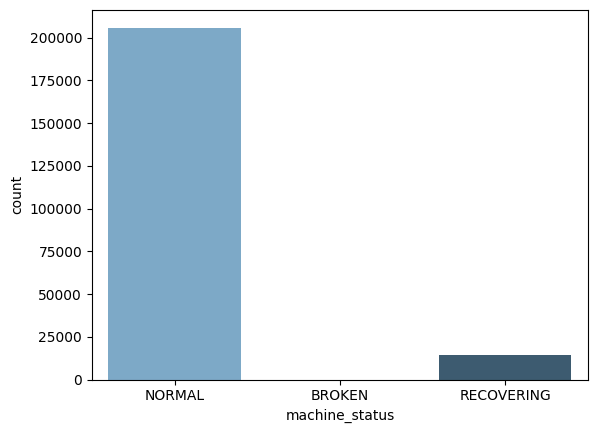

In [ ]:
import seaborn as sns
print(df.machine_status.value_counts())
sns.countplot(x='machine_status',data=df,palette='Blues_d');

Shape analysis

In [ ]:
# It looks like some of the sensors show the same behavior, even though they different scales.
# We might group the sensor in terms of their behaviour.

df.drop(columns=['timestamp']).plot(subplots=True, sharex = True, figsize = (25,50))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

Error in callback <function _draw_all_if_interactive at 0x7af72971d120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7af72971c3a0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16      

Mean Median Mode analysis

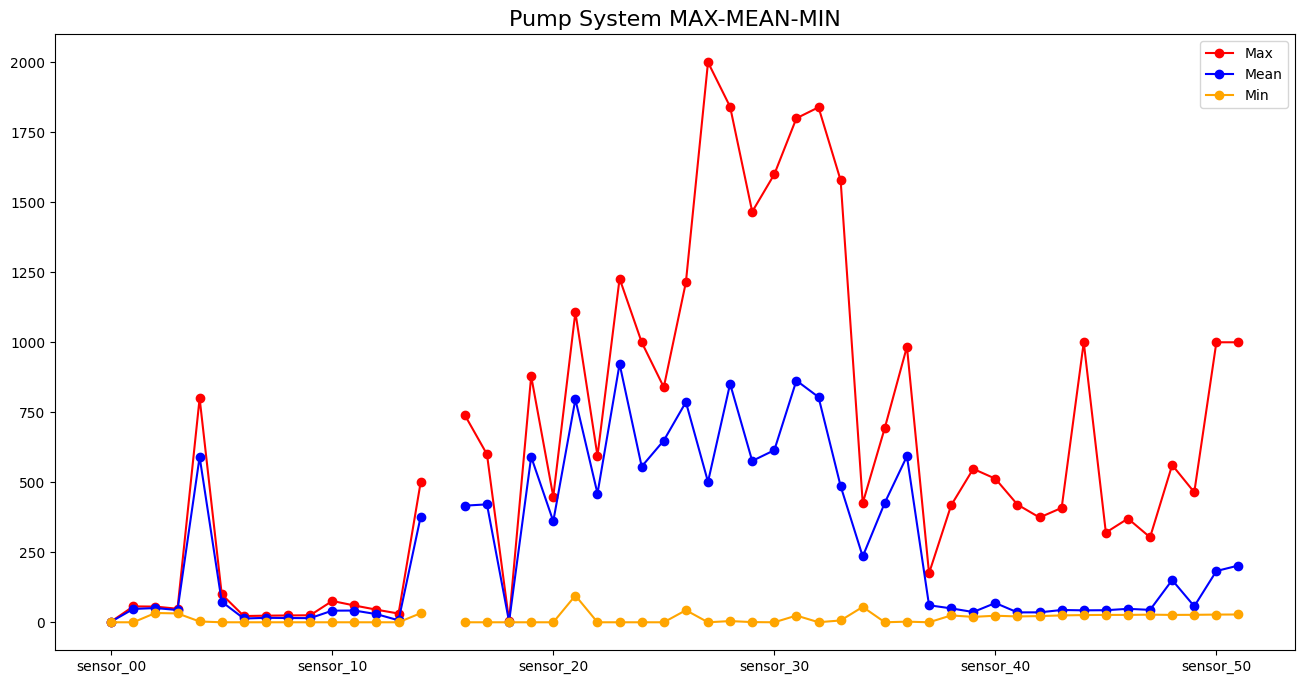

In [ ]:
df_numeric = df.drop(columns=['timestamp','machine_status'])
df_mean = df_numeric.mean()
df_max_compare = df_numeric.max(numeric_only=True)
df_min_compare = df_numeric.min(numeric_only=True)
df_max_compare.plot.line(figsize=(16,8), marker='o', color='red', label='Max').set_title('Pump System MAX-MEAN-MIN', fontsize=16)
df_mean.plot.line(marker='o', color='blue', label='Mean')
df_min_compare.plot.line(marker='o', color='orange', label='Min')

plt.legend()

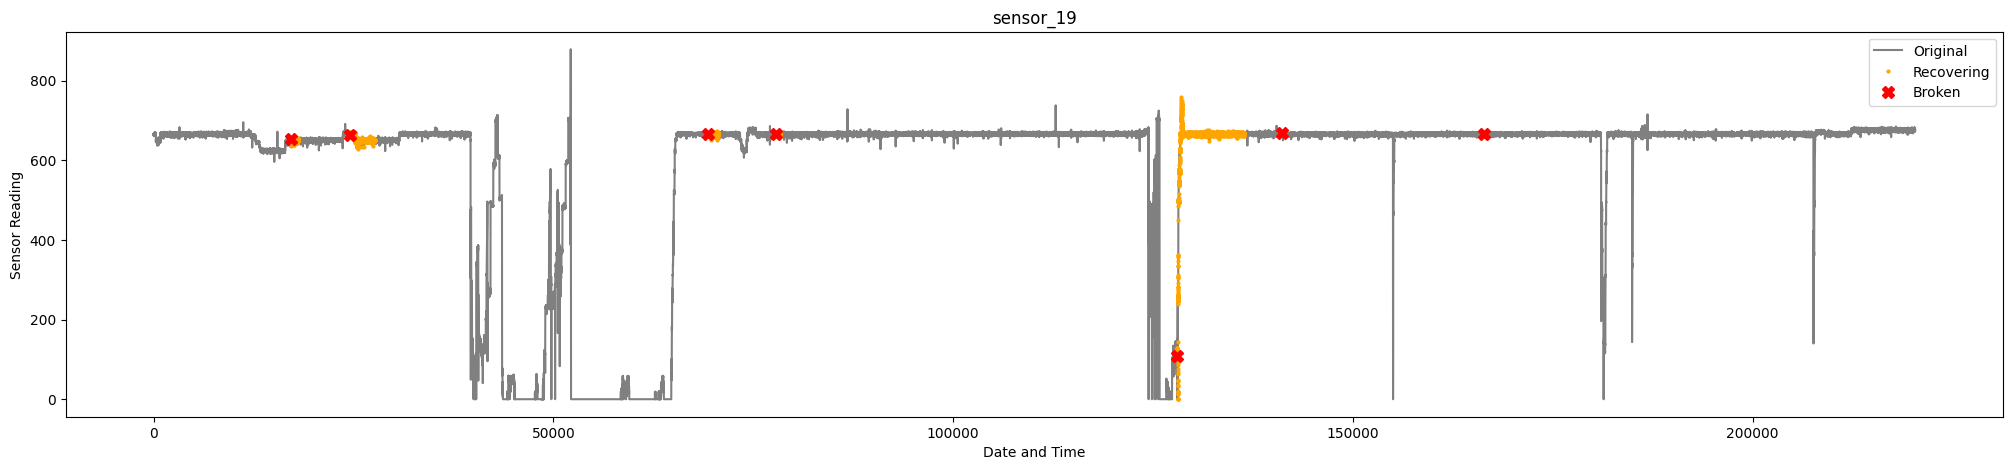

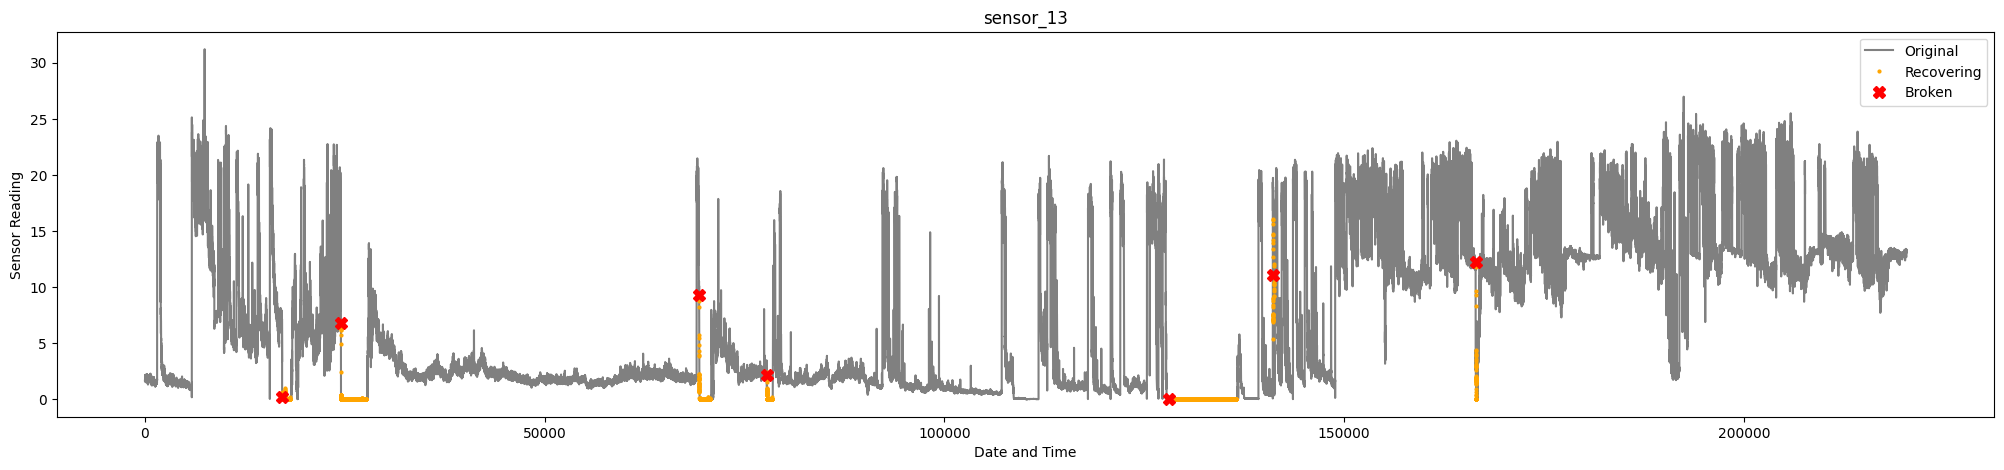

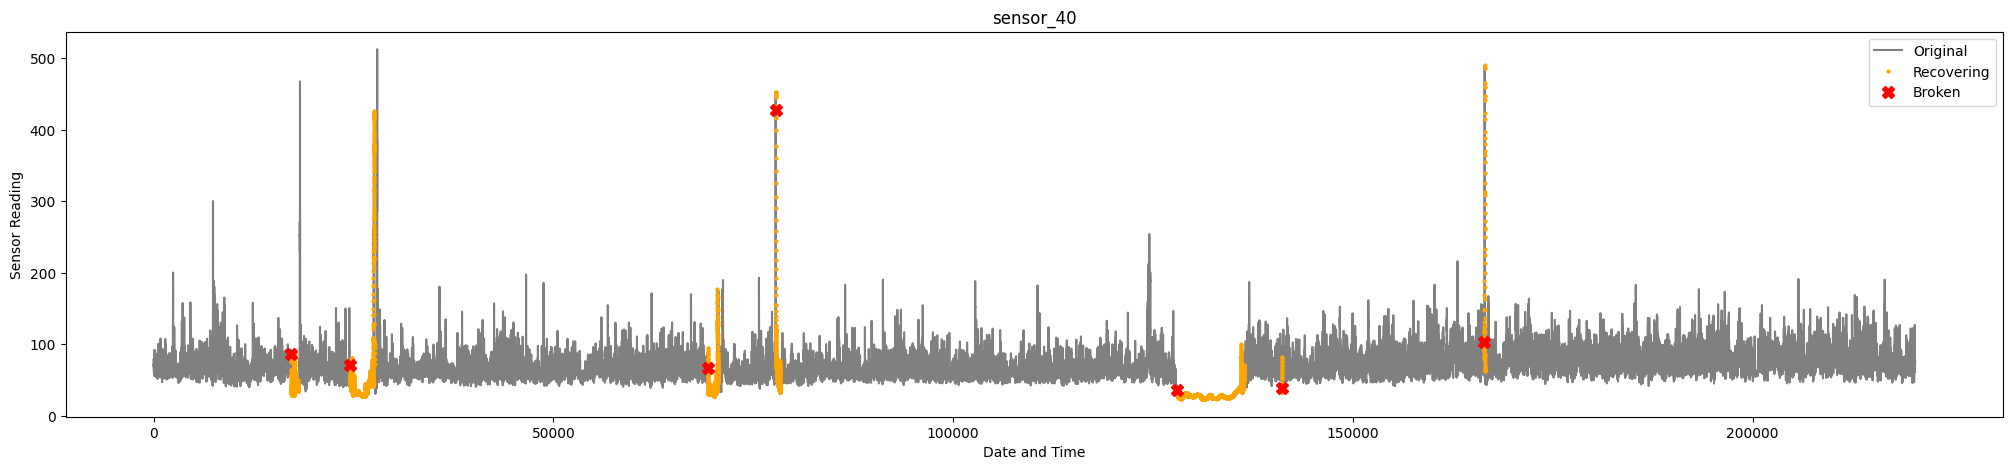

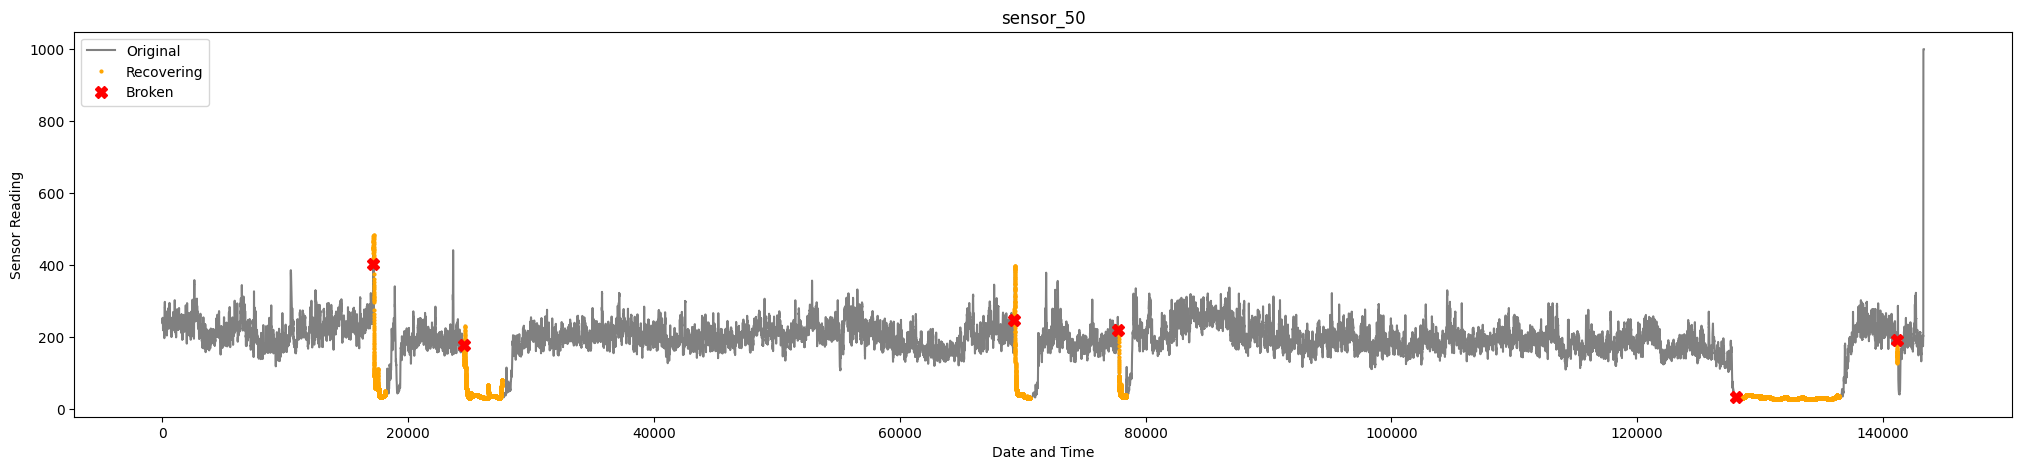

In [ ]:
broken = df[df['machine_status']=='BROKEN']
recovering = df[df['machine_status']=='RECOVERING']
sensors = ['sensor_19','sensor_13','sensor_40','sensor_50']
for sensor in sensors:
  fig, ax = plt.subplots(1, 1, figsize=(25, 5))
  plt.plot(df[sensor], color='grey',label='Original')
  plt.plot(recovering[sensor], linestyle='none', marker='o', color='orange', markersize=2, label='Recovering')
  plt.plot(broken[sensor], linestyle='none', marker='X', color='red', markersize=8, label='Broken')
  #ax.axvline(test.index.min(), color='black', ls='--')
  #ax.set_facecolor('xkcd:white')
  plt.xlabel('Date and Time')
  plt.ylabel('Sensor Reading')
  plt.title(sensor)
  plt.legend(loc='best')
  plt.show()

In [ ]:
df.shape

(220320, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16      

In [ ]:
y=df['machine_status']

In [ ]:
df.drop(columns=['timestamp','machine_status'])

In [ ]:
#dropping sensor 15 because it is entirely null
df.drop(columns=['sensor_15'])

In [ ]:
#Missing values are filled with median value of respective columns
for column in df.columns:

    if df[column].isnull().any():

        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

print(df.isnull().sum())

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0


In [ ]:
df.info()

In [ ]:
import numpy as np
def min_max_normalization(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data

numeric_columns = df.select_dtypes(include=['int64', 'float64'])
normalized_data_min_max = min_max_normalization(numeric_columns)


In [ ]:
import matplotlib.pyplot as plt
df_numeric = df.drop(columns=['timestamp','machine_status'])
df_numeric.hist(df_numeric.columns, bins=25, layout=(8,7), figsize=(20, 18))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

normalized_data_min_max.hist(normalized_data_min_max.columns, bins=25, layout=(8,7), figsize=(20, 18))
plt.show()

In [ ]:
df.shape

(220320, 54)

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['machine_status']=encoder.fit_transform(df['machine_status'])


In [ ]:
df.head()

In [ ]:
df.drop(['timestamp','sensor_15','sensor_50'],axis=1,inplace=True)
#case where time is nt considered

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,1
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,1
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,1


10 Imp features

Using RandomForestclassifier

In [ ]:
y=df['machine_status'].values
x=df.drop(['machine_status'],axis=1).values

In [ ]:
print(x.shape)
y.shape

(220320, 50)


(220320,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,shuffle=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(154224, 50)
(66096, 50)
(154224,)
(66096,)


In [ ]:
from sklearn import metrics

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split=25, max_depth=14, max_features=10)
model.fit(x,y)


RandomForestClassifier(max_depth=14, max_features=10, min_samples_split=25,
                       n_estimators=200)

In [ ]:
columns=df.columns
columns=columns.drop(['machine_status'])
columns

In [ ]:
featimp = pd.Series(model.feature_importances_,index=columns).sort_values(ascending=False)
print(featimp)

sensor_10
sensor_12  
sensor_11
sensor_13
sensor_04
sensor_48
sensor_49
sensor_40
sensor_05
sensor_01

sensor_04 sensor_11 sensor_10 sensor_05 sensor_12 sensor_02 sensor_03  sensor_06 sensor_00 sensor_01    

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model2= ExtraTreesClassifier()
model2.fit(x, y)
#Relative importance of each feature


In [ ]:
featimp = pd.Series(model2.feature_importances_,index=columns).sort_values(ascending=False)
print(featimp)

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_sm,y_sm=smt.fit_resample(x,y)

In [ ]:
SMOTE
FEATURE (top 10 using random forest) + Mechanical
BEST MODEL
hybridisation techniques
comparison and final model

In [ ]:
x_sm.shape

(617508, 50)

In [ ]:
df = pd.DataFrame(x_sm)


In [ ]:
df_y=pd.DataFrame(y_sm)
df_y.value_counts()

0    205836
1    205836
2    205836
Name: count, dtype: int64

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889
